<a href="https://colab.research.google.com/github/Vonewman/fastai_courses/blob/main/introduction_to_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.PETS)/'images'

In [4]:
def is_cat(x): return x[0].isupper()

In [5]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

In [6]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [7]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.177519,0.014212,0.004060,00:56


epoch,train_loss,valid_loss,error_rate,time
0,0.064567,0.026170,0.010149,00:52


## Tester le modèle entrainé

In [8]:
import ipywidgets as widgets

uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [9]:
# Charger un exemple de test
img = PILImage.create(uploader.data[0])

# Utiliser le modèle pour prédire un résultat
is_cat_pred,_,probs = learn.predict(img)

# Afficher le résultat
print(f"Is this a cat?: {is_cat_pred}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


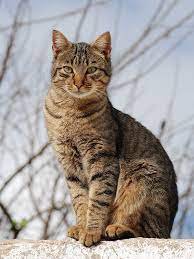

In [10]:
img

## Examiner les données en entrée et en sortie

In [11]:
files = get_image_files(path)
files

(#7390) [Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_146.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_146.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_171.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_232.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_178.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_72.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Bengal_91.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_100.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_5.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_165.jpg')...]

In [12]:
is_cat(files[0].name),is_cat(files[2].name)

(False, False)

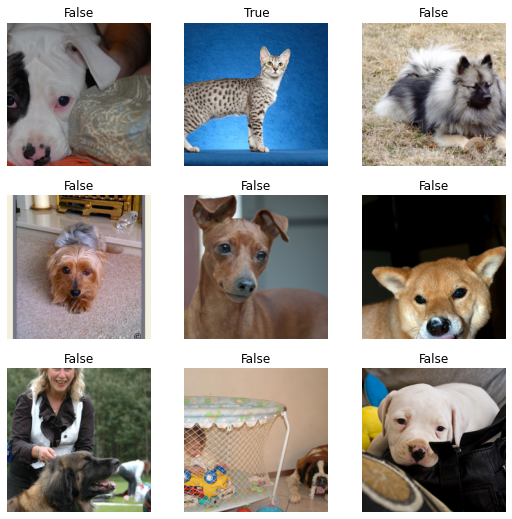

In [13]:
dls.show_batch()

In [14]:
learn.predict(img)

('True', TensorBase(1), TensorBase([5.2393e-16, 1.0000e+00]))

In [15]:
path = untar_data(URLs.CAMVID_TINY)

dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.874953,2.292862,00:01


epoch,train_loss,valid_loss,time
0,1.808588,1.777840,00:01
1,1.588990,1.401329,00:01
2,1.415062,1.131949,00:01
3,1.252111,0.965278,00:01
4,1.119115,0.939355,00:01
5,1.009006,0.907518,00:01
6,0.920434,0.854139,00:01
7,0.849609,0.864680,00:01


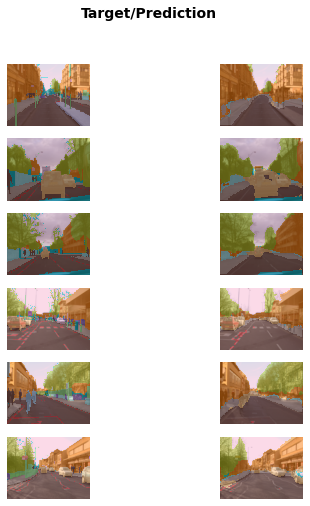

In [16]:
learn.show_results(max_n=6, figsize=(7,8))

## Langage naturel (NLP) : Analyse de sentiment sur les critiques de films

In [18]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.481288,0.404702,0.819800,03:20


epoch,train_loss,valid_loss,accuracy,time
0,0.299450,0.275053,0.891120,07:05
1,0.239116,0.210715,0.915560,07:05
2,0.187270,0.190184,0.925680,07:05
3,0.144820,0.191300,0.929640,07:05
